In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Algorithms/Data/BIDV_BID.csv')
data = data.drop_duplicates()
data.head()

,Date,Close,Open,High,Low,Vol,Change%,Unnamed: 7,Unnamed: 8
0,3/1/2017,11235.8,10642.5,11235.8,10642.5,6230000,0.067,NaN,NaN
1,4/1/2017,11458.3,11347.1,11643.7,11347.1,5880000,0.020,NaN,NaN
2,5/1/2017,11421.2,11384.1,11643.7,11272.9,2500000,-0.003,NaN,NaN
3,6/1/2017,11680.8,11272.9,11903.3,11272.9,7970000,0.023,NaN,NaN
4,9/1/2017,12014.5,11717.9,12162.9,11717.9,7750000,0.029,NaN,NaN


In [ ]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

# Chia train test theo tỉ lệ 7:3

In [ ]:
# 2. Chia train test theo tỉ lệ 7:3

df = data[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))
# val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
# val_data = df[train_size+test_size:]

In [ ]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
# x_val= np.array(val_data.index).reshape(-1, 1)
# y_val = np.array(val_data['Close'])
# y_pred_val =  model.predict(x_val)

In [ ]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[47294.84390904 47315.25260923 47335.66130943 47356.07000962
 47376.47870981 47396.88741    47417.29611019 47437.70481038
 47458.11351057 47478.52221076 47498.93091095 47519.33961114
 47539.74831133 47560.15701153 47580.56571172 47600.97441191
 47621.3831121  47641.79181229 47662.20051248 47682.60921267
 47703.01791286 47723.42661305 47743.83531324 47764.24401343
 47784.65271363 47805.06141382 47825.47011401 47845.8788142
 47866.28751439 47886.69621458]


In [ ]:
# 7. Đánh giá độ chính xác test
# valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
# print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Testing RMSE: 6089.828205680429


In [ ]:
def calculate_mape(y_true, y_pred):
    """
    Tính toán Mean Absolute Percentage Error (MAPE).

    Tham số:
    - y_true: Mảng chứa giá trị thực tế.
    - y_pred: Mảng chứa giá trị dự đoán.

    Trả về:
    - Giá trị MAPE.
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Sử dụng hàm calculate_mape để tính toán MAPE trên tập test
test_mape = calculate_mape(y_test, y_pred)
print('Testing MAPE:', test_mape)


Testing MAPE: 14.75456511987471


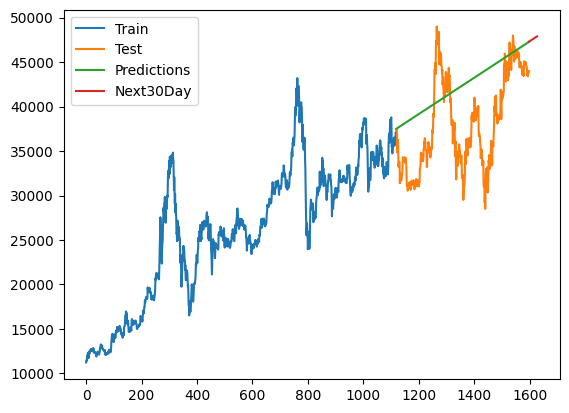

In [ ]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
# plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
# plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [ ]:
test_data.index

RangeIndex(start=1119, stop=1598, step=1)

# Chia train test theo tỉ lệ 8:2

In [ ]:
# 2. Chia train test theo tỉ lệ 8:2

df = data[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [ ]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

In [ ]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[45038.10308505 45056.65723766 45075.21139027 45093.76554289
 45112.3196955  45130.87384812 45149.42800073 45167.98215335
 45186.53630596 45205.09045857 45223.64461119 45242.1987638
 45260.75291642 45279.30706903 45297.86122164 45316.41537426
 45334.96952687 45353.52367949 45372.0778321  45390.63198472
 45409.18613733 45427.74028994 45446.29444256 45464.84859517
 45483.40274779 45501.9569004  45520.51105301 45539.06520563
 45557.61935824 45576.17351086]


In [ ]:
# 7. Đánh giá độ chính xác validate, test
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 5003.152658912928


In [ ]:
def calculate_mape(y_true, y_pred):
    """
    Tính toán Mean Absolute Percentage Error (MAPE).

    Tham số:
    - y_true: Mảng chứa giá trị thực tế.
    - y_pred: Mảng chứa giá trị dự đoán.

    Trả về:
    - Giá trị MAPE.
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Sử dụng hàm calculate_mape để tính toán MAPE trên tập test
test_mape = calculate_mape(y_test, y_pred)
print('Testing MAPE:', test_mape)


Testing MAPE: 11.160414849587944


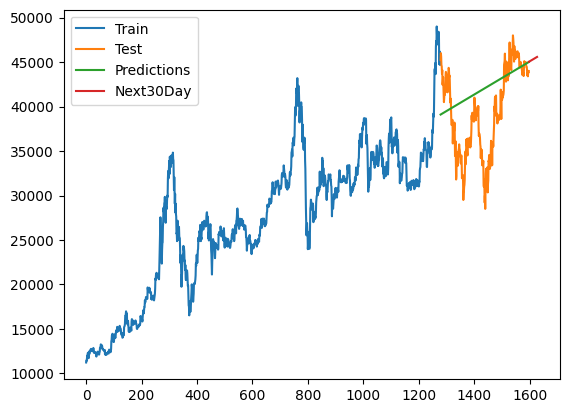

In [ ]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

# Chia train test theo tỉ lệ 9:1

In [ ]:
# 2. Chia train test theo tỉ lệ 9:1

df = data[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.9 * len(df))
test_size = int(0.1 * len(df))

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [ ]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

In [ ]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[43473.707751   43490.8802369  43508.05272281 43525.22520872
 43542.39769463 43559.57018053 43576.74266644 43593.91515235
 43611.08763825 43628.26012416 43645.43261007 43662.60509597
 43679.77758188 43696.95006779 43714.12255369 43731.2950396
 43748.46752551 43765.64001142 43782.81249732 43799.98498323
 43817.15746914 43834.32995504 43851.50244095 43868.67492686
 43885.84741276 43903.01989867 43920.19238458 43937.36487049
 43954.53735639 43971.7098423 ]


In [ ]:
# 7. Đánh giá độ chính xác validate, test
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 4109.968338116748


In [ ]:
def calculate_mape(y_true, y_pred):
    """
    Tính toán Mean Absolute Percentage Error (MAPE).

    Tham số:
    - y_true: Mảng chứa giá trị thực tế.
    - y_pred: Mảng chứa giá trị dự đoán.

    Trả về:
    - Giá trị MAPE.
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Sử dụng hàm calculate_mape để tính toán MAPE trên tập test
test_mape = calculate_mape(y_test, y_pred)
print('Testing MAPE:', test_mape)


Testing MAPE: 8.502815600921974


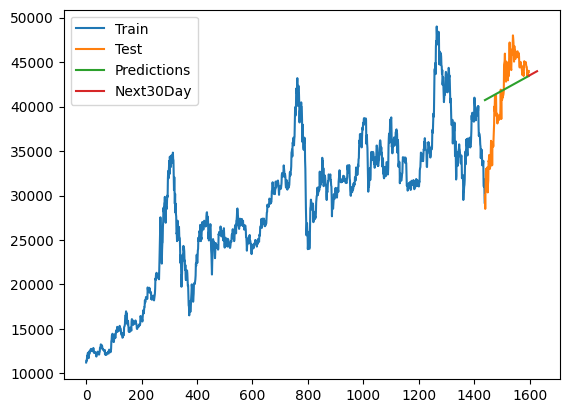

In [ ]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()